In [1]:
from scipy import constants as C
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
import matplotlib.colors as mcolors

In [16]:
n1= np.array([0.22,0.3,0.32,0.36,0.36,0.39,0.43,0.46,0.49,0.47,0.53,0.54,0.62,0.57,0.64])
n2= np.array([0.64,0.96,1.08,1.14,1.18,1.29,1.04,1.44,1.51,1.66,1.66,1.79,1.90,1.96,2.04])
n3=np.array([1.23,1.90,2.07,2.25,2.40,2.56,2.68,2.92,3.13,3.31,3.38,3.53,3.68,3.96,4.16])
n4=np.array([2.01,2.82,2.99,3.27,3.42,3.72,4.00,4.12,4.41,4.66,4.66])
V=np.array([200,300,325,350,375,400,425,450,475,500,525,550,575,600,625])
V4=np.array([200,300,325,350,375,400,425,450,475,500,525])

def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

#_x = np.linspace(np.min(x),np.max(x),2)
#param = GetFit(x,y)
#ym = GetModel(_x,param)

R2=[0.97,0.99,0.95,0.99]


[0.00543785 0.00099153]


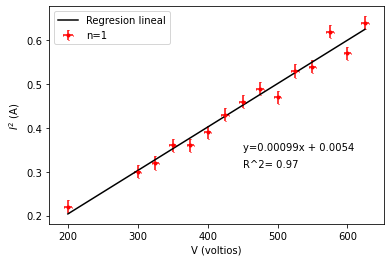

In [92]:
#n=1
_x = np.linspace(np.min(V),np.max(V),2)
param = GetFit(V,n1)
ym = GetModel(_x,param)

plt.errorbar(V, n1,xerr=5.25,yerr=0.015,capsize=0.5,color='r',fmt='.',label = "n=1")
plt.plot(_x,ym,color='k',label = "Regresion lineal")

plt.text(450, 0.35, 'y={}x + {}'.format(round(param[1],5),round(param[0],4)))
plt.text(450,0.31,'R^2= {}'.format(R2[0]))

plt.xlabel('V (voltios)')
plt.ylabel(r'$I^2$ (A)')
plt.legend()
print(param)

[-0.06155771  0.00332785]


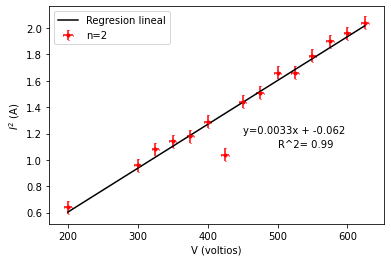

In [91]:
#n=2
_x = np.linspace(np.min(V),np.max(V),2)
param = GetFit(V,n2)
ym = GetModel(_x,param)


plt.errorbar(V, n2,xerr=5.25,yerr=0.05,capsize=0.5,color='r',fmt='.',label = "n=2")
plt.plot(_x,ym,color='k',label = "Regresion lineal")

plt.text(450, 1.2, 'y={}x + {}'.format(round(param[1],4),round(param[0],3)))
plt.text(500,1.1,'R^2= {}'.format(R2[1]))

plt.xlabel('V (voltios)')
plt.ylabel(r'$I^2$ (A)')
plt.legend()

print(param)

[-0.13271994  0.00676416]


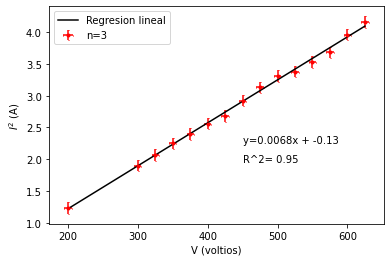

In [90]:
#n=3
_x = np.linspace(np.min(V),np.max(V),2)
param = GetFit(V,n3)
ym = GetModel(_x,param)

plt.errorbar(V, n3,xerr=5.25,yerr=0.09,capsize=0.5,color='r',fmt='.',label = "n=3")
plt.plot(_x,ym,color='k',label = "Regresion lineal")

plt.text(450, 2.25, 'y={}x + {}'.format(round(param[1],4),round(param[0],2)))
plt.text(450,1.95,'R^2= {}'.format(R2[2]))

plt.xlabel('V (voltios)')
plt.ylabel(r'$I^2$ (A)')
plt.legend()
print(param)

[0.24191411 0.00865178]


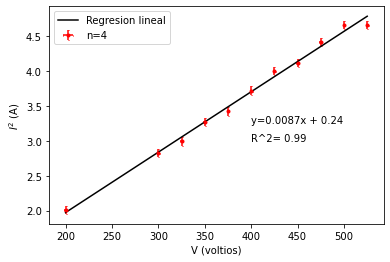

In [96]:
#n=4
_x = np.linspace(np.min(V4),np.max(V4),2)
param = GetFit(V4,n4)
ym = GetModel(_x,param)

plt.errorbar(V4, n4,xerr=1.48,yerr=0.058,capsize=0.5,color='r',fmt='.',label = "n=4")
plt.plot(_x,ym,color='k',label = "Regresion lineal")

plt.text(400, 3.25, 'y={}x + {}'.format(round(param[1],4),round(param[0],2)))
plt.text(400,3,'R^2= {}'.format(R2[3]))

plt.xlabel('V (voltios)')
plt.ylabel(r'$I^2$ (A)')
plt.legend()
print(param)

In [69]:
l=0.151 #m
L=0.255 #m
N=570
u_0=4*np.pi*(10**(-7)) #permeamilidad

Iprom=np.array([0.66,1.18,1.68,1.89]) #A

In [59]:
n=2
N=3
l = V4.shape[0]
A = np.ones((l,n+1))
for i in range(1,n+1):
        A[:,i] = V4**i
A=A[:,1:3]
R = n4 - np.dot(A,param)
sigma2 = np.dot( R.T, R )/(N-len(param))
CVar = sigma2*np.linalg.inv(np.dot(A.T,A))
np.diag(CVar)[0]*np.diag(CVar)[1]

1.4890443443402352

In [94]:
B=u_0*(N/L)*Iprom
B

array([0.00185391, 0.00331457, 0.00471904, 0.00530892])

In [88]:
n=3
m=np.array([0.00099153,0.00332785,0.00676416,0.00865178])
a=(8*(np.pi**2)*(L**2)*(n**2)) /((u_0**2)*(N**2)*(l**2))
em= a/m
np.sum(em)/len(em)

1552774127895.854